In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [20]:
nba_games = pd.read_csv('nba_games.csv',index_col = 0)
nba_games.head()

mp   mp.1    fg    fga    fg%   3p   3pa    3p%    ft   fta  ...  \
0  240.0  240.0  39.0   81.0  0.481  6.0  20.0  0.300  14.0  18.0  ...   
1  240.0  240.0  36.0  100.0  0.360  7.0  31.0  0.226  16.0  19.0  ...   
2  240.0  240.0  37.0   85.0  0.435  8.0  19.0  0.421  17.0  23.0  ...   
3  240.0  240.0  41.0   89.0  0.461  8.0  21.0  0.381  17.0  19.0  ...   
4  240.0  240.0  27.0   86.0  0.314  6.0  26.0  0.231  15.0  20.0  ...   

   tov%_max_opp  usg%_max_opp  ortg_max_opp  drtg_max_opp  team_opp  \
0          22.8          29.0         178.0         111.0       DAL   
1          50.0          32.6         152.0         111.0       ATL   
2          20.0          30.9         148.0         116.0       SAS   
3          28.6          30.9         138.0         118.0       MIN   
4          16.8          30.9         157.0          90.0       MEM   

   total_opp  home_opp  season        date    won  
0         95         1    2016  2015-12-09   True  
1         98         0    2016  2015-12-09  False  
2        107         1    2018  2017-10-18  False  
3         99         0    2018  2017-10-18   True  
4         92         1    2021  2021-04-30  False  

[5 rows x 150 columns]

In [21]:
df = nba_games.copy()

In [22]:
def add_won_next_game(group):
    group["Won Next"] = group["won"].shift(-1)
    return group

df = pd.read_csv("nba_games.csv", index_col=0)
df = df.sort_values("date").reset_index(drop=True).drop(['mp', 'mp.1', 'index_opp'], axis = 1)
df = df.groupby("team", group_keys=False).apply(add_won_next_game).dropna(subset=["Won Next"])
df[df['team'] == 'OKC']

fg    fga    fg%    3p   3pa    3p%    ft   fta    ft%   orb  ...  \
20     42.0   86.0  0.488   7.0  19.0  0.368  21.0  22.0  0.955  11.0  ...   
55     50.0  110.0  0.455   8.0  27.0  0.296  31.0  38.0  0.816  22.0  ...   
87     45.0   86.0  0.523  13.0  25.0  0.520  14.0  18.0  0.778  13.0  ...   
97     40.0   84.0  0.476  10.0  23.0  0.435  15.0  22.0  0.682  14.0  ...   
121    39.0   82.0  0.476   8.0  23.0  0.348  12.0  14.0  0.857  11.0  ...   
...     ...    ...    ...   ...   ...    ...   ...   ...    ...   ...  ...   
17442  36.0   84.0  0.429  11.0  34.0  0.324  18.0  29.0  0.621  12.0  ...   
17475  43.0   87.0  0.494  17.0  41.0  0.415  14.0  18.0  0.778  12.0  ...   
17487  39.0   81.0  0.481   9.0  29.0  0.310  11.0  22.0  0.500  13.0  ...   
17509  37.0   90.0  0.411  16.0  37.0  0.432  11.0  17.0  0.647  11.0  ...   
17539  40.0   88.0  0.455   6.0  29.0  0.207  15.0  19.0  0.789   9.0  ...   

       usg%_max_opp  ortg_max_opp  drtg_max_opp  team_opp  total_opp  \
20             33.1         159.0         119.0       SAS        106   
55             27.1         173.0         126.0       ORL        136   
87             28.4         226.0         131.0       DEN         93   
97             36.0         115.0         110.0       HOU        110   
121            30.0         156.0         110.0       TOR        103   
...             ...           ...           ...       ...        ...   
17442          34.0         211.0         114.0       DET        110   
17475          31.6         250.0         133.0       PHO         96   
17487          30.6         218.0         115.0       POR         94   
17509          32.9         216.0         121.0       UTA        137   
17539          28.0         214.0         106.0       LAL        120   

       home_opp  season        date    won  Won Next  
20            0    2016  2015-10-28   True      True  
55            1    2016  2015-10-30   True      True  
87            0    2016  2015-11-01   True     False  
97            1    2016  2015-11-02  False     False  
121           0    2016  2015-11-04  False     False  
...         ...     ...         ...    ...       ...  
17442         0    2022  2022-04-01  False      True  
17475         0    2022  2022-04-03   True      True  
17487         0    2022  2022-04-05   True     False  
17509         1    2022  2022-04-06  False     False  
17539         1    2022  2022-04-08  False     False  

[594 rows x 148 columns]

In [23]:
df[df['team'] == 'WAS']

fg    fga    fg%    3p   3pa    3p%    ft   fta    ft%   orb  ...  \
11     33.0   84.0  0.393   7.0  28.0  0.250  15.0  25.0  0.600  15.0  ...   
63     35.0   68.0  0.515  12.0  21.0  0.571  36.0  44.0  0.818   8.0  ...   
69     38.0   90.0  0.422   6.0  22.0  0.273  28.0  33.0  0.848  11.0  ...   
124    42.0   87.0  0.483   8.0  23.0  0.348  10.0  14.0  0.714   4.0  ...   
161    36.0   88.0  0.409   8.0  25.0  0.320  18.0  23.0  0.783  10.0  ...   
...     ...    ...    ...   ...   ...    ...   ...   ...    ...   ...  ...   
17432  49.0   90.0  0.544  17.0  33.0  0.515  20.0  22.0  0.909   8.0  ...   
17471  38.0   82.0  0.463   8.0  21.0  0.381  18.0  20.0  0.900   7.0  ...   
17483  56.0  101.0  0.554  13.0  30.0  0.433   7.0  14.0  0.500   9.0  ...   
17510  42.0   86.0  0.488  10.0  35.0  0.286   9.0  11.0  0.818   6.0  ...   
17538  35.0   69.0  0.507   9.0  28.0  0.321  13.0  17.0  0.765   2.0  ...   

       usg%_max_opp  ortg_max_opp  drtg_max_opp  team_opp  total_opp  \
11             25.2         134.0          98.0       ORL         87   
63             32.4         138.0         122.0       MIL        113   
69             28.7         153.0         108.0       NYK        117   
124            30.0         160.0         109.0       SAS         99   
161            41.6         146.0         103.0       BOS        118   
...             ...           ...           ...       ...        ...   
17432          40.6         141.0         143.0       DAL        103   
17471          34.4         245.0         116.0       BOS        144   
17483          32.8         168.0         132.0       MIN        114   
17510          60.2         159.0         114.0       ATL        118   
17538          35.5         135.0         104.0       NYK        114   

       home_opp  season        date    won  Won Next  
11            1    2016  2015-10-28   True      True  
63            1    2016  2015-10-30   True     False  
69            0    2016  2015-10-31  False      True  
124           0    2016  2015-11-04   True     False  
161           1    2016  2015-11-06  False     False  
...         ...     ...         ...    ...       ...  
17432         0    2022  2022-04-01   True     False  
17471         1    2022  2022-04-03  False      True  
17483         1    2022  2022-04-05   True     False  
17510         1    2022  2022-04-06  False     False  
17538         0    2022  2022-04-08  False     False  

[579 rows x 148 columns]

In [24]:
df['team'].value_counts()

team
GSW    654
BOS    652
TOR    634
MIL    627
MIA    616
CLE    609
HOU    609
LAC    606
UTA    604
PHI    604
POR    602
DEN    602
OKC    594
SAS    592
DAL    592
ATL    589
PHO    589
MEM    584
IND    582
LAL    580
WAS    579
BRK    579
NOP    570
ORL    564
MIN    557
CHI    557
DET    555
CHO    555
SAC    553
NYK    552
Name: count, dtype: int64

In [25]:
df["won"].value_counts()

won
True     8881
False    8861
Name: count, dtype: int64

In [26]:
nulls = pd.isnull(df).sum()
nulls = nulls[nulls > 0]
valid_columns = df.columns[~df.columns.isin(nulls.index)]
valid_columns

Index(['fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%', 'orb',
       ...
       'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp', 'team_opp', 'total_opp',
       'home_opp', 'season', 'date', 'won', 'Won Next'],
      dtype='object', length=142)

In [27]:
df = df[valid_columns].copy()
df

fg   fga    fg%    3p   3pa    3p%    ft   fta    ft%   orb  ...  \
0      35.0  83.0  0.422   6.0  18.0  0.333  19.0  27.0  0.704   8.0  ...   
1      38.0  94.0  0.404   9.0  29.0  0.310  10.0  17.0  0.588  11.0  ...   
2      37.0  87.0  0.425   7.0  19.0  0.368  16.0  23.0  0.696   7.0  ...   
3      41.0  96.0  0.427   9.0  30.0  0.300  20.0  22.0  0.909  21.0  ...   
4      37.0  82.0  0.451   8.0  27.0  0.296  12.0  15.0  0.800   7.0  ...   
...     ...   ...    ...   ...   ...    ...   ...   ...    ...   ...  ...   
17765  43.0  89.0  0.483  13.0  35.0  0.371  17.0  24.0  0.708  15.0  ...   
17766  40.0  91.0  0.440  15.0  43.0  0.349  12.0  15.0  0.800  16.0  ...   
17767  34.0  85.0  0.400  15.0  38.0  0.395  14.0  19.0  0.737  11.0  ...   
17768  41.0  88.0  0.466   9.0  40.0  0.225  13.0  15.0  0.867   4.0  ...   
17769  31.0  75.0  0.413  11.0  32.0  0.344  21.0  31.0  0.677   8.0  ...   

       usg%_max_opp  ortg_max_opp  drtg_max_opp  team_opp  total_opp  \
0              43.7         206.0         104.0       GSW        111   
1              34.6         162.0         104.0       CHI         97   
2              29.0         138.0         105.0       CLE         95   
3              38.9         201.0         120.0       NOP         95   
4              23.6         132.0         104.0       DET        106   
...             ...           ...           ...       ...        ...   
17765          32.7         164.0         135.0       GSW        100   
17766          32.4         205.0         120.0       BOS         97   
17767          36.3         133.0         112.0       GSW        107   
17768          94.4         300.0         112.0       BOS         94   
17769          36.2         222.0         107.0       GSW        104   

       home_opp  season        date    won  Won Next  
0             1    2016  2015-10-27  False     False  
1             1    2016  2015-10-27  False      True  
2             0    2016  2015-10-27   True      True  
3             0    2016  2015-10-27   True      True  
4             0    2016  2015-10-27  False      True  
...         ...     ...         ...    ...       ...  
17765         0    2022  2022-06-08   True     False  
17766         1    2022  2022-06-10   True      True  
17767         0    2022  2022-06-10  False     False  
17768         0    2022  2022-06-13   True      True  
17769         1    2022  2022-06-13  False     False  

[17742 rows x 142 columns]

#### Steps:

##### Performing Preprocessing and Feature Selection
##### Dimensionality Reduction Process using the Standardization of Data 
##### Performing Logistic Regression
##### Calculating the Accuracy Scores and Classification Report


We performed preprocessing and feature selection in two steps:
Low Variance Filter - Removes features with little variability.
High Correlation Filter - Removes features highly correlated with others.


In [28]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Step 1: Low Variance Filter

# Set a threshold; features with variance below this will be removed
variance_threshold = 0.01  # This can be adjusted
selector = VarianceThreshold(threshold=variance_threshold)
filtered_data_low_variance = selector.fit_transform(numerical_data)

# Get the names of the retained columns after variance filtering
retained_columns_variance = numerical_data.columns[selector.get_support()]

# Step 2: High Correlation Filter
# Compute the correlation matrix again for the reduced set of columns
correlation_matrix_reduced = pd.DataFrame(filtered_data_low_variance, columns=retained_columns_variance).corr()

# Find pairs of highly correlated features
threshold = 0.9  # Correlation threshold for filtering
to_drop = set()
for i in range(correlation_matrix_reduced.shape[0]):
    for j in range(i + 1, correlation_matrix_reduced.shape[1]):
        if abs(correlation_matrix_reduced.iloc[i, j]) > threshold:
            to_drop.add(correlation_matrix_reduced.columns[j])

# Retain columns that are not in the `to_drop` set
final_columns = [col for col in retained_columns_variance if col not in to_drop]


reduced_data = numerical_data[final_columns]
final_columns

['fg',
 'fga',
 '3p',
 '3pa',
 'ft',
 'ft%',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts',
 'drb%',
 'trb%',
 'ast%',
 'ortg',
 'drtg',
 'fg_max',
 'fga_max',
 'fg%_max',
 '3p_max',
 '3pa_max',
 '3p%_max',
 'ft_max',
 'orb_max',
 'drb_max',
 'trb_max',
 'ast_max',
 'stl_max',
 'blk_max',
 'tov_max',
 'pf_max',
 'pts_max',
 '+/-_max',
 'ts%_max',
 '3par_max',
 'ftr_max',
 'orb%_max',
 'drb%_max',
 'trb%_max',
 'ast%_max',
 'stl%_max',
 'blk%_max',
 'tov%_max',
 'usg%_max',
 'ortg_max',
 'home',
 'mp_opp',
 'fg_opp',
 'fga_opp',
 '3p_opp',
 '3pa_opp',
 'ft_opp',
 'ft%_opp',
 'drb_opp',
 'trb_opp',
 'ast_opp',
 'stl_opp',
 'blk_opp',
 'tov_opp',
 'pf_opp',
 'pts_opp',
 'ast%_opp',
 'fg_max_opp',
 'fga_max_opp',
 'fg%_max_opp',
 '3p_max_opp',
 '3pa_max_opp',
 '3p%_max_opp',
 'ft_max_opp',
 'orb_max_opp',
 'drb_max_opp',
 'trb_max_opp',
 'ast_max_opp',
 'stl_max_opp',
 'blk_max_opp',
 'tov_max_opp',
 'pf_max_opp',
 'pts_max_opp',
 '+/-_max_opp',
 'ts%_max_opp',
 '3p

In [29]:
# Standardizing our data
scaler = StandardScaler()
final_columns.append('won')
final_columns.remove('season')
df[final_columns] = scaler.fit_transform(df[final_columns])
final_columns.append('season')
new_df = df[final_columns].copy()
new_df

fg       fga        3p       3pa        ft       ft%       orb  \
0     -0.948757 -0.555662 -1.267673 -1.618856  0.265002 -0.646104 -0.563913   
1     -0.374773  0.964717 -0.510263 -0.226759 -1.243176 -1.773112  0.242071   
2     -0.566101 -0.002797 -1.015203 -1.492301 -0.237724 -0.723828 -0.832574   
3      0.199211  1.241149 -0.510263 -0.100205  0.432577  1.345592  2.928682   
4     -0.566101 -0.693878 -0.762733 -0.479868 -0.908026  0.286593 -0.832574   
...         ...       ...       ...       ...       ...       ...       ...   
17765  0.581867  0.273636  0.499619  0.532566 -0.070149 -0.607241  1.316715   
17766  0.007883  0.550068  1.004559  1.545000 -0.908026  0.286593  1.585376   
17767 -1.140085 -0.279229  1.004559  0.912229 -0.572875 -0.325489  0.242071   
17768  0.199211  0.135419 -0.510263  1.165338 -0.740450  0.937537 -1.638557   
17769 -1.714070 -1.661391 -0.005322  0.152904  0.600152 -0.908425 -0.563913   

            drb       trb       ast  ...  drb%_max_opp  trb%_max_opp  \
0     -1.671141 -1.700801 -0.513159  ...     -0.829045      0.012094   
1      0.917663  0.895528  0.452832  ...     -0.005553      0.096607   
2      1.102577  0.437353 -2.058745  ...      0.242224     -0.135804   
3      0.178004  1.811880  1.032427  ...     -0.894633     -1.213343   
4     -0.191825 -0.631724 -0.319961  ...      0.191211     -0.030163   
...         ...       ...       ...  ...           ...           ...   
17765 -0.376739  0.437353  0.839229  ...      0.963691      0.159991   
17766  0.917663  1.659155 -0.706357  ...     -0.916495     -0.653445   
17767 -0.561654 -0.326274 -0.319961  ...     -0.690582     -0.537240   
17768  0.178004 -0.784449 -0.126763  ...      3.368580      1.829121   
17769  0.917663  0.437353 -1.092754  ...     -0.515681     -0.843599   

       ast%_max_opp  stl%_max_opp  blk%_max_opp  tov%_max_opp  usg%_max_opp  \
0          0.498448      2.928000     -0.165192      1.382286      1.038972   
1         -0.839387     -0.698223      0.743557      0.618605     -0.030820   
2         -0.778577     -0.698223      1.413946     -0.456205     -0.689154   
3          0.045746     -0.142054     -0.403552     -0.121505      0.474686   
4         -0.481280     -0.609236     -0.641913     -0.319497     -1.323976   
...             ...           ...           ...           ...           ...   
17765     -0.278577     -0.320028      4.378555      2.824795     -0.254184   
17766     -1.062360     -0.186547     -0.299270     -0.673053     -0.289452   
17767     -0.846144      0.035921      0.192349      0.133055      0.169031   
17768      3.870065     -0.809457      0.505197      0.232051      6.999245   
17769      1.133583     -0.053066     -0.209885     -0.319497      0.157275   

       ortg_max_opp       won  season  
0          0.681888 -1.001128    2016  
1         -0.396519 -1.001128    2016  
2         -0.984741  0.998873    2016  
3          0.559342  0.998873    2016  
4         -1.131797 -1.001128    2016  
...             ...       ...     ...  
17765     -0.347500  0.998873    2022  
17766      0.657379  0.998873    2022  
17767     -1.107287 -1.001128    2022  
17768      2.985758  0.998873    2022  
17769      1.074036 -1.001128    2022  

[17742 rows x 97 columns]

In [30]:
df['season'].value_counts()

season
2016    2632
2018    2624
2019    2624
2017    2618
2022    2616
2021    2342
2020    2286
Name: count, dtype: int64

In [31]:
# Define features and target y
X = new_df  # Features

y = df['Won Next']
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Converting labels to 0, 1, ... for usage

# Splitting data into training and testing sets by season (earlier seasons as tranining, later seasons as testing)
train_seasons = [2016, 2017, 2018, 2019, 2020,2021]  # Seasons to include in training-- earlier seasons
test_seasons = [2022]  # Seasons to include in testing-- later seasons

# Create training set
X_train = X[df['season'].isin(train_seasons)]
y_train = y[df['season'].isin(train_seasons)]

# Create testing set
X_test = X[df['season'].isin(test_seasons)]
y_test = y[df['season'].isin(test_seasons)]

X_train.drop('season', axis=1)
X_test.drop('season', axis=1)


# Training our logistic regression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [32]:
X_train # Predictions
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5428134556574924
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.49      0.52      1308
           1       0.54      0.60      0.57      1308

    accuracy                           0.54      2616
   macro avg       0.54      0.54      0.54      2616
weighted avg       0.54      0.54      0.54      2616



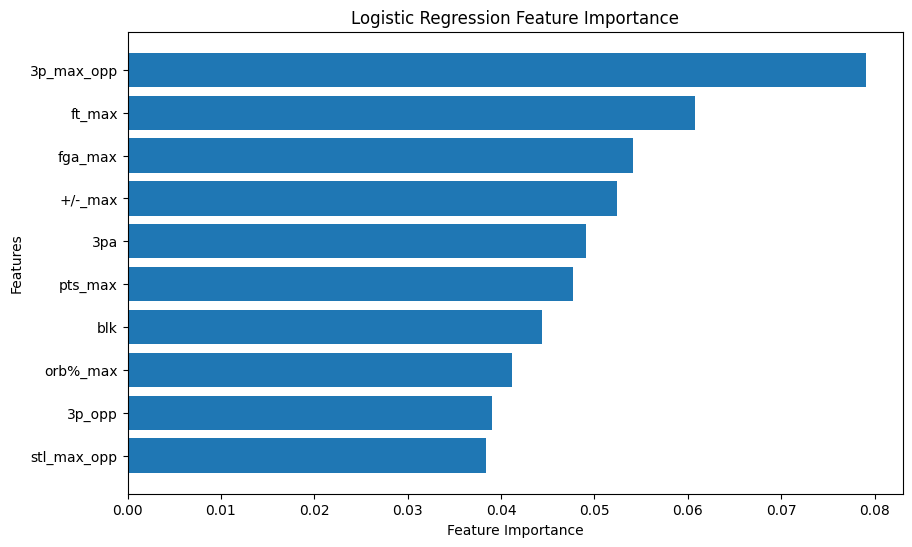

In [33]:
# Display feature coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importances = coefficients['Coefficient']
feature_names = coefficients['Feature']

# Creating a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()
plt.show()


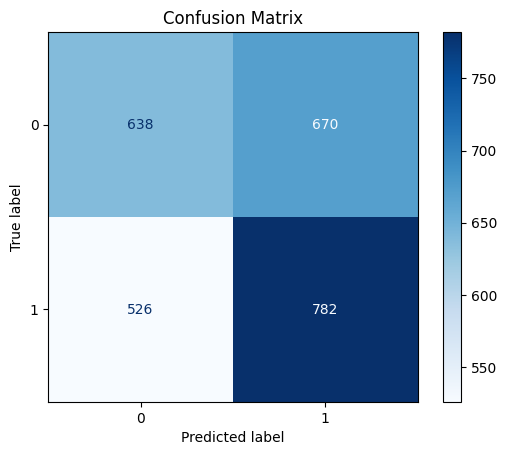

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

# Predict on test data
y_pred = log_reg.predict(X_test)

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

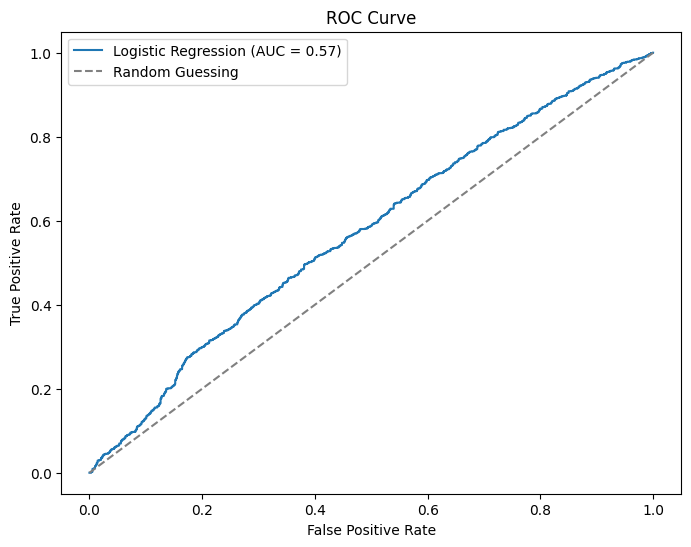

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

# Our predicted probabilities
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = cm.ravel()

TPR = TP / (TP + FN) 
FPR = FP / (FP + TN)
Precision = TP / (TP + FP)


print(f"True Positive Rate (TPR): {TPR:.2f}")
print(f"False Positive Rate (FPR): {FPR:.2f}")
print(f"Precision: {Precision:.2f}")

True Positive Rate (TPR): 0.60
False Positive Rate (FPR): 0.51
Precision: 0.54
